In [8]:
#     AUTHOR:     ERYL KENN VICTORINO
#     PURPOSE:    UPPER CONFIDENCE BOUND (UCB) TUTORIAL
#                 from 'Machine Learning A-Z™: Hands-On Python & R In Data Science' on Udemy
#                 by Kirill Eremenko, Hadelin de Ponteves, and the SuperDataScience Team
#     MOD DATE:   3/31/2019

In [9]:
#   IMPORT LIBRARIES
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

In [10]:
#   IMPORT DATASET
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [11]:
#   IMPLEMENT RANDOM SELECTION (FOR COMPARISON)
N = dataset.shape[0]
d = dataset.shape[1]
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

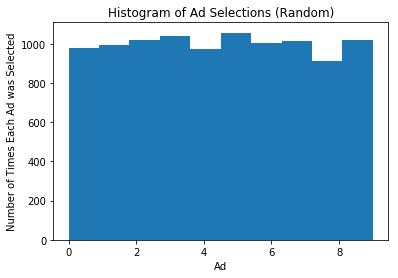

In [12]:
#   VISUALIZE RANDOM SELECTION (FOR COMPARISON)
plt.hist(ads_selected)
plt.title('Histogram of Ad Selections (Random)')
plt.xlabel('Ad')
plt.ylabel('Number of Times Each Ad was Selected')
plt.show()

In [13]:
#   IMPLEMENT UCB
N = dataset.shape[0]
d = dataset.shape[1]
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

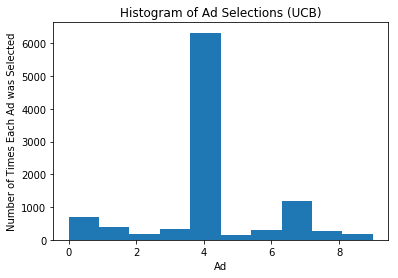

In [14]:
#   VISUALIZE UCB
plt.hist(ads_selected)
plt.title('Histogram of Ad Selections (UCB)')
plt.xlabel('Ad')
plt.ylabel('Number of Times Each Ad was Selected')
plt.show()